## 1 Context
In this exercise, you will generate a binary response variable, and then train some SVM on that data. You will vary the values of the parameters in the estimations and look at the effect of the predicted classes.

## 2. Generate some data

### 1. Generate 200 points from the unit square:
• for example, draw the x1 coordinates from a U[0, 1] distribution and the x2 coordinates from a U[0, 1] .

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
x1 = []
x2 = []
for i, j in zip(range(200), range(200)):
    x1.append(np.random.uniform(0,1))
    x2.append(np.random.uniform(0,1))


In [61]:
df = pd.DataFrame()
df["x1"] = np.array(x1)
df["x2"] = np.array(x2)

### 2. Assign the label “blue” and “orange” to each of the 200 observations according to the following rule:

• if 2 × x1 + 0.25 − x2 > 0 and −2 × x1 + 2 − x2 > 0, then the label should be “orange”

• otherwise, the label should be “blue”

In [62]:
df["label"] = np.where(((2 * df.x1 + 0.25 - df.x2) > 0) & ((-2 * df.x1 + 2 - df.x2) > 0), "orange", "blue")

### 3. Now, add a noise to each point. The noise should be randomly drawn from a U[−.1, .1] (this way, the 200 generated points should not be perfectly separable).

In [63]:
noise = []
for i in range(200):
    noise.append(np.random.uniform(-0.1,0.1)) 

In [64]:
df["noise"] = np.array(noise)

### 4. Graph your points on a scatter plot, where the color of each point should reflect its label. Add the true boundaries. The equations of the separating lines are : x2 = 2x1 + 0.25 and x2 = −2x + 2.

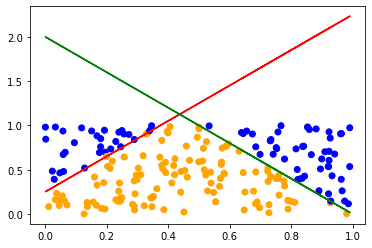

In [65]:
plt.scatter(df.x1, df.x2, c = df.label)

#add linear regression line to scatterplot 
plt.plot(df.x1, 2 * df.x1 + 0.25, color = "red")
#add linear regression line to scatterplot 
plt.plot(df.x1, -2 * df.x1 + 2, color = "green")


In [66]:
df["x1_noise"] = df.x1 + df.noise
df["x2_noise"] = df.x2 + df.noise

In [67]:
df

,x1,x2,label,noise,x1_noise,x2_noise
0,0.923676,0.707254,blue,0.052153,0.975828,0.759407
1,0.778714,0.619797,blue,0.044819,0.823534,0.664617
2,0.941671,0.676555,blue,-0.077861,0.863810,0.598694
3,0.753294,0.736695,blue,-0.068602,0.684693,0.668094
4,0.333065,0.913927,orange,0.017124,0.350189,0.931050
...,...,...,...,...,...,...
195,0.790235,0.054818,orange,0.028351,0.818586,0.083168
196,0.514569,0.741116,orange,0.036859,0.551428,0.777975
197,0.899739,0.621122,blue,-0.021627,0.878112,0.599495
198,0.386041,0.049156,orange,0.077939,0.463981,0.127095


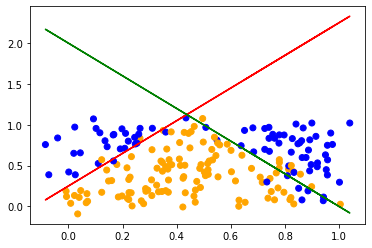

In [68]:
plt.scatter(df.x1_noise, df.x2_noise, c = df.label)

#add linear regression line to scatterplot 
plt.plot(df.x1_noise, 2 * df.x1_noise + 0.25, color = "red")
#add linear regression line to scatterplot 
plt.plot(df.x1_noise, -2 * df.x1_noise + 2, color = "green")

## 3. Training the SVM algorithm

### 1. Using either R or Python, train a SVM classifier on your 200 points, picking a linear kernel. Then, visualize the resulting boundaries. What can you see?

In [69]:
from sklearn.svm import SVC

In [70]:
y_train = df.label
X_train  = df[["x1", "x2"]]

In [71]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [72]:
prediction = svc.predict(X_train)
prediction

array(['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'blue',
       'orange', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange',
       'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue',
       'orange', 'blue', 'orange', 'blue', 'orange', 'orange', 'orange',
       'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'orange',
       'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'blue',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue',
       'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'blue',
       'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange',
       'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange',
       'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'blue',
       'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 

In [74]:
df["prediction"] = np.array(prediction).tolist()

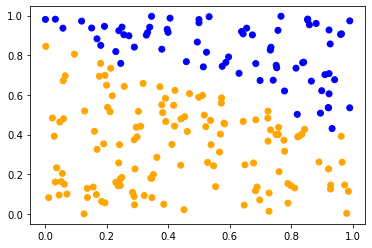

In [79]:
plt.scatter(df.x1, df.x2, c = df.prediction)


### 2. Now, fit a SVM classifier using a polynomial kernel. According to the true form of your boundary, what value of the degree should you pick?